<a href="https://colab.research.google.com/github/Davydmunoz0/winequality-white/blob/main/winequality_white.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


--- Dataset de Vinhos Brancos ---

Distribuição das classes:
target
0    3838
1    1060
Name: count, dtype: int64


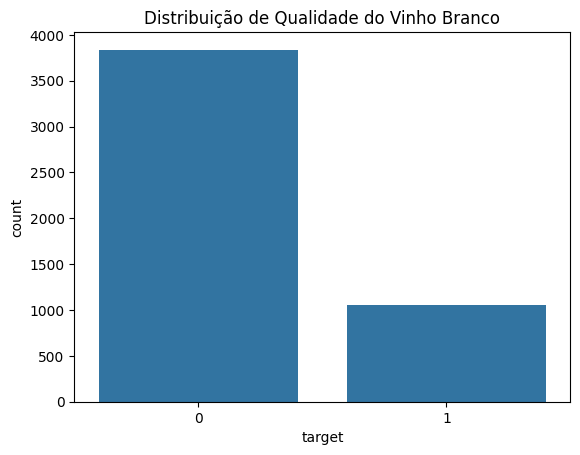


--- Avaliação dos Modelos em Vinhos Brancos ---
SVM (Vinho Branco) - Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1152
           1       0.73      0.31      0.44       318

    accuracy                           0.83      1470
   macro avg       0.78      0.64      0.67      1470
weighted avg       0.81      0.83      0.80      1470



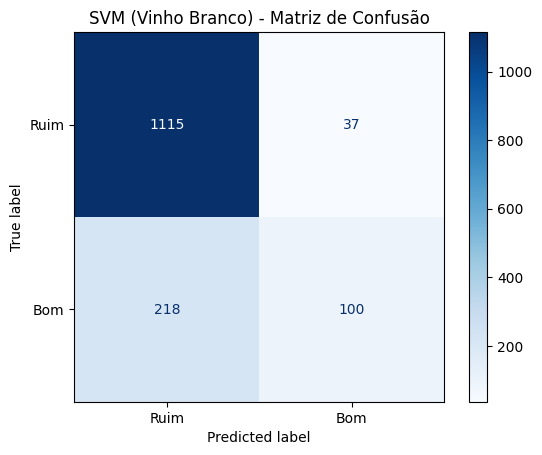

SVM (Vinho Branco) - ROC-AUC: 0.84


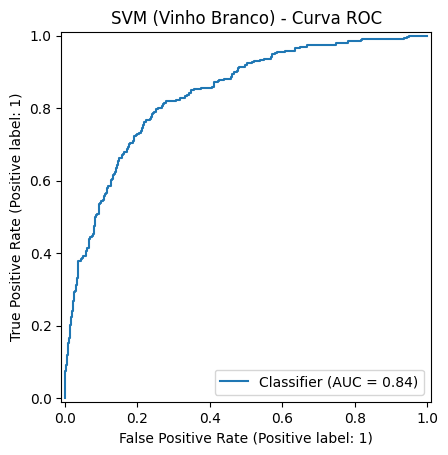

Árvore de Decisão (Vinho Branco) - Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1152
           1       0.62      0.62      0.62       318

    accuracy                           0.83      1470
   macro avg       0.76      0.76      0.76      1470
weighted avg       0.83      0.83      0.83      1470



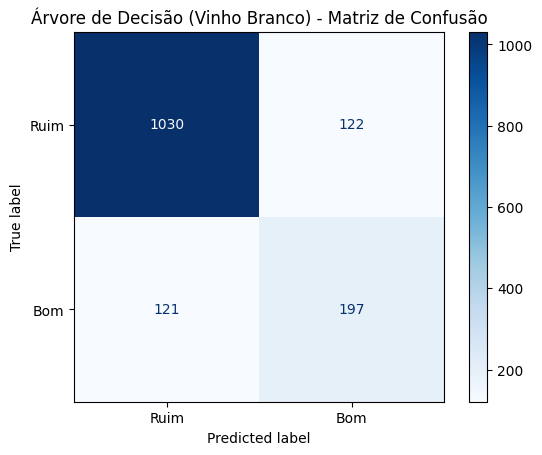

Árvore de Decisão (Vinho Branco) - ROC-AUC: 0.76


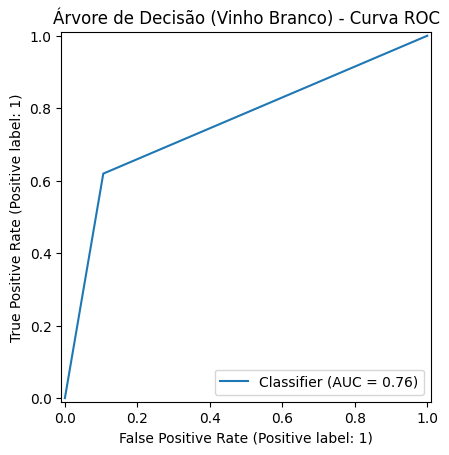

Gradient Boosting (Vinho Branco) - Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1152
           1       0.67      0.38      0.49       318

    accuracy                           0.83      1470
   macro avg       0.76      0.66      0.69      1470
weighted avg       0.81      0.83      0.81      1470



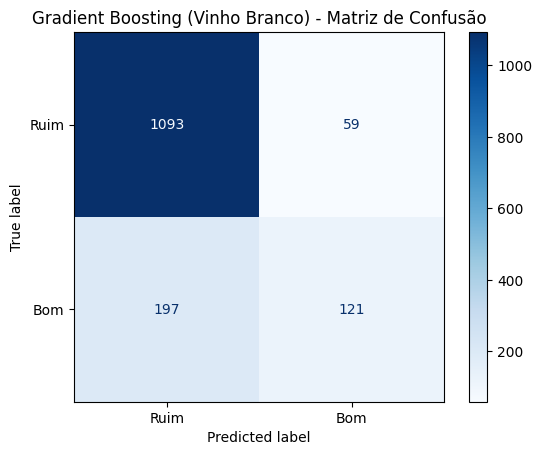

Gradient Boosting (Vinho Branco) - ROC-AUC: 0.86


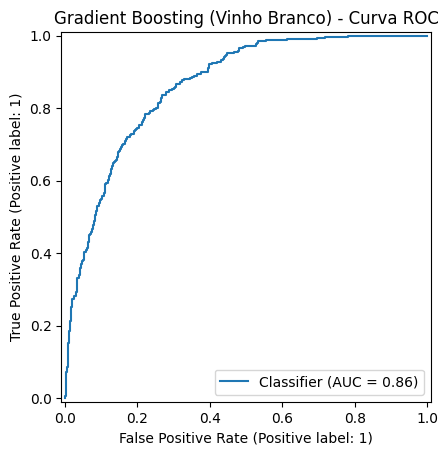

In [5]:
# Importação de bibliotecas (mantendo as anteriores)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (confusion_matrix, classification_report,
                             roc_auc_score, RocCurveDisplay, ConfusionMatrixDisplay)

# Função para avaliação binária (COPIAR ESTA PARTE DO CÓDIGO ANTERIOR)
def evaluate_binary(model, X_test, y_test, model_name, scaled=False):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    print(f"{model_name} - Relatório de Classificação:")
    print(classification_report(y_test, y_pred))

    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Ruim', 'Bom'], cmap='Blues')
    plt.title(f'{model_name} - Matriz de Confusão')
    plt.show()

    roc_auc = roc_auc_score(y_test, y_prob)
    print(f"{model_name} - ROC-AUC: {roc_auc:.2f}")
    RocCurveDisplay.from_predictions(y_test, y_prob)
    plt.title(f'{model_name} - Curva ROC')
    plt.show()

# Carregar dataset de vinhos brancos
url_white = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
df_white = pd.read_csv(url_white, sep=';')

# Criar target binário (qualidade >=7 é "Bom")
df_white['target'] = df_white['quality'].apply(lambda x: 1 if x >=7 else 0)
X_white = df_white.drop(['quality', 'target'], axis=1)
y_white = df_white['target']

# Análise Exploratória (EDA) Inicial
print("\n--- Dataset de Vinhos Brancos ---")
print("\nDistribuição das classes:")
print(df_white['target'].value_counts())
sns.countplot(x='target', data=df_white)
plt.title('Distribuição de Qualidade do Vinho Branco')
plt.show()

# Pré-processamento
X_white_train, X_white_test, y_white_train, y_white_test = train_test_split(
    X_white, y_white, test_size=0.3, random_state=42, stratify=y_white)

# Padronização para SVM
scaler_white = StandardScaler()
X_white_train_scaled = scaler_white.fit_transform(X_white_train)
X_white_test_scaled = scaler_white.transform(X_white_test)

# Treinar e avaliar modelos
print("\n--- Avaliação dos Modelos em Vinhos Brancos ---")

# SVM
svm_white = SVC(probability=True, random_state=42)
svm_white.fit(X_white_train_scaled, y_white_train)
evaluate_binary(svm_white, X_white_test_scaled, y_white_test, "SVM (Vinho Branco)", scaled=True)

# Árvore de Decisão
dt_white = DecisionTreeClassifier(random_state=42)
dt_white.fit(X_white_train, y_white_train)
evaluate_binary(dt_white, X_white_test, y_white_test, "Árvore de Decisão (Vinho Branco)")

# Gradient Boosting
gb_white = GradientBoostingClassifier(random_state=42)
gb_white.fit(X_white_train, y_white_train)
evaluate_binary(gb_white, X_white_test, y_white_test, "Gradient Boosting (Vinho Branco)")